In [2]:
import pandas as pd
import numpy as np

### 8.1 Hierarchical Indexing（层次化索引）

创建一个Series，并用一个由列表或数组组成的列表作为索引：

In [5]:
data = pd.Series(np.random.randn(9),
                index = [['a', 'a', 'a', 'b', 'b', 'c', 'c', 'd', 'd'],
                        [1, 2, 3, 1, 3, 1, 2, 2, 3]])
data

a  1    0.071999
   2   -0.131529
   3   -0.707093
b  1   -0.712007
   3    0.500942
c  1    2.128376
   2   -0.967187
d  2    0.424500
   3    0.313908
dtype: float64

In [6]:
data.index

MultiIndex([('a', 1),
            ('a', 2),
            ('a', 3),
            ('b', 1),
            ('b', 3),
            ('c', 1),
            ('c', 2),
            ('d', 2),
            ('d', 3)],
           )

In [7]:
# 多层索引引用数据的例子：
data['b']

1   -0.712007
3    0.500942
dtype: float64

In [8]:
data['b': 'c']

b  1   -0.712007
   3    0.500942
c  1    2.128376
   2   -0.967187
dtype: float64

In [9]:
data.loc[['b', 'd']]

b  1   -0.712007
   3    0.500942
d  2    0.424500
   3    0.313908
dtype: float64

In [10]:
data.loc[:, 2] #在内层选取

a   -0.131529
c   -0.967187
d    0.424500
dtype: float64

In [12]:
data.unstack() # 通过unstack方法将这段数据重新安排到一个DataFrame中

,1,2,3
a,0.071999,-0.131529,-0.707093
b,-0.712007,NaN,0.500942
c,2.128376,-0.967187,NaN
d,NaN,0.424500,0.313908


In [13]:
data.unstack().stack() #snstack的逆运算，返回多层索引的series

a  1    0.071999
   2   -0.131529
   3   -0.707093
b  1   -0.712007
   3    0.500942
c  1    2.128376
   2   -0.967187
d  2    0.424500
   3    0.313908
dtype: float64

In [14]:
frame = pd.DataFrame(np.arange(12).reshape((4, 3)),
                     index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                      columns=[['Ohio', 'Ohio', 'Colorado'],
                               ['Green', 'Red', 'Green']])
frame # 对于一个DataFrame，每条轴都可以有分层索引

Ohio     Colorado
    Green Red    Green
a 1     0   1        2
  2     3   4        5
b 1     6   7        8
  2     9  10       11

In [16]:
# 定义各层index的名称
frame.index.names = ['Key1', 'Key2']
frame.columns.names = ['state', 'color']

frame

state      Ohio     Colorado
color     Green Red    Green
Key1 Key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [17]:
frame['Ohio']

color      Green  Red
Key1 Key2            
a    1         0    1
     2         3    4
b    1         6    7
     2         9   10

In [21]:
# 单独创建MultiIndex然后复用。上面那个DataFrame中的（带有分级名称）列可以这样创建
pd.MultiIndex.from_arrays([['Ohio', 'Ohio', 'Colorado'],
                             ['Green', 'Red', 'Green']],
                             names=['state', 'color'])

MultiIndex([(    'Ohio', 'Green'),
            (    'Ohio',   'Red'),
            ('Colorado', 'Green')],
           names=['state', 'color'])

#### Reordering and Sorting Levels（重排与分级排序）

In [23]:
frame.swaplevel('Key1', 'Key2')# 调换Index级别，数据不发生变化

state      Ohio     Colorado
color     Green Red    Green
Key2 Key1                   
1    a        0   1        2
2    a        3   4        5
1    b        6   7        8
2    b        9  10       11

In [27]:
frame.swaplevel(0, 1).sort_index(level=0)#根据index级别与行列调换

state      Ohio     Colorado
color     Green Red    Green
Key2 Key1                   
1    a        0   1        2
     b        6   7        8
2    a        3   4        5
     b        9  10       11

#### Summary Statistics by Level（根据级别汇总）

In [28]:
frame

state      Ohio     Colorado
color     Green Red    Green
Key1 Key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [30]:
frame.sum(level = 'Key2')#行求和

state  Ohio     Colorado
color Green Red    Green
Key2                    
1         6   8       10
2        12  14       16

In [31]:
frame.sum(level = 'color', axis = 1)#列求和

color      Green  Red
Key1 Key2            
a    1         2    1
     2         8    4
b    1        14    7
     2        20   10

#### Indexing with a DataFrame’s columns（使用DataFrame的列进行索引）

In [32]:
frame = pd.DataFrame({'a': range(7), 'b': range(7, 0, -1),
                       'c': ['one', 'one', 'one', 'two', 'two',
                             'two', 'two'],
                       'd': [0, 1, 2, 0, 1, 2, 3]})

In [37]:
frame

,a,b,c,d
0,0,7,one,0
1,1,6,one,1
2,2,5,one,2
3,3,4,two,0
4,4,3,two,1
5,5,2,two,2
6,6,1,two,3


In [35]:
frame2 = frame.set_index(['c', 'd'])# 将选中列作为索引，创建新的DataFrame
frame2

a  b
c   d      
one 0  0  7
    1  1  6
    2  2  5
two 0  3  4
    1  4  3
    2  5  2
    3  6  1

In [36]:
frame.set_index(['c', 'd'], drop = False)# 将选作索引的列保留

a  b    c  d
c   d              
one 0  0  7  one  0
    1  1  6  one  1
    2  2  5  one  2
two 0  3  4  two  0
    1  4  3  two  1
    2  5  2  two  2
    3  6  1  two  3

In [38]:
frame2.reset_index()# 层次化索引的级别会被转移到列里面

,c,d,a,b
0,one,0,0,7
1,one,1,1,6
2,one,2,2,5
3,two,0,3,4
4,two,1,4,3
5,two,2,5,2
6,two,3,6,1


### 8.2 Combining and Merging Datasets（数据的结合与合并）

In [40]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': range(7)})
df2 = pd.DataFrame({'key': ['a', 'b', 'd'],
                    'data2': range(3)})

In [41]:
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [42]:
df2

,key,data2
0,a,0
1,b,1
2,d,2


In [44]:
pd.merge(df1, df2)
# pd.merge()：多对一的合并,df1数据有多个被标记为a和b的行，df2key每个值只对应一行

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


如果没有指定，merge就会将重叠列的列名合并做键。不过，最好明确指定一下：

In [57]:
pd.merge(df1, df2, on='key')

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [59]:
df3 = pd.DataFrame({'lkey': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                     'data1': range(7)})

df4 = pd.DataFrame({'rkey': ['a', 'b', 'd'],
                     'data2': range(3)})

pd.merge(df3, df4, left_on='lkey', right_on='rkey')
# 两个对象的列名不同，也可以分别进行指定

,lkey,data1,rkey,data2
0,b,0,b,1
1,b,1,b,1
2,b,6,b,1
3,a,2,a,0
4,a,4,a,0
5,a,5,a,0


默认情况下，merge做的是“内连接”；结果中的键是交集。其他方式还有"left"、"right"以及"outer"。外连接求取的是键的并集，组合了左连接和右连接的效果：

In [64]:
pd.merge(df1, df2, how='outer') # 取并集

,key,data1,data2
0,b,0.0,1.0
1,b,1.0,1.0
2,b,6.0,1.0
3,a,2.0,0.0
4,a,4.0,0.0
5,a,5.0,0.0
6,c,3.0,NaN
7,d,NaN,2.0


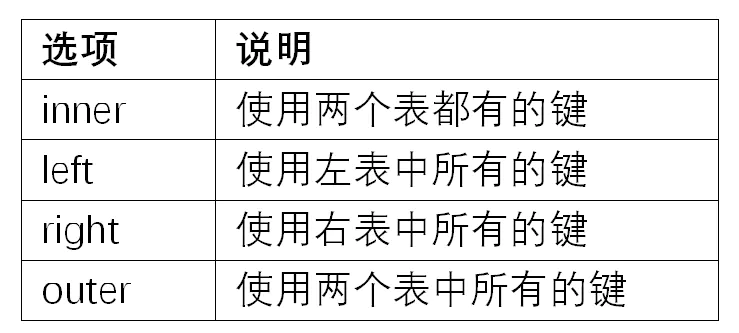

In [65]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                     'data1': range(6)})

df2 = pd.DataFrame({'key': ['a', 'b', 'a', 'b', 'd'],
                     'data2': range(5)})

In [66]:
pd.merge(df1, df2, on = 'key', how = 'left')

,key,data1,data2
0,b,0,1.0
1,b,0,3.0
2,b,1,1.0
3,b,1,3.0
4,a,2,0.0
5,a,2,2.0
6,c,3,NaN
7,a,4,0.0
8,a,4,2.0
9,b,5,1.0


In [67]:
pd.merge(df1, df2, how = 'inner') # 连接方式只影响出现在结果中的不同的键的值

,key,data1,data2
0,b,0,1
1,b,0,3
2,b,1,1
3,b,1,3
4,b,5,1
5,b,5,3
6,a,2,0
7,a,2,2
8,a,4,0
9,a,4,2


In [69]:
left = pd.DataFrame({'key1': ['foo', 'foo', 'bar'],
                      'key2': ['one', 'two', 'one'],
                      'lval': [1, 2, 3]})

right = pd.DataFrame({'key1': ['foo', 'foo', 'bar', 'bar'],
                       'key2': ['one', 'one', 'one', 'two'],
                       'rval': [4, 5, 6, 7]})

In [70]:
pd.merge(left, right, on = ['key1', 'key2'], how = 'outer') # 多个键进行合并

,key1,key2,lval,rval
0,foo,one,1.0,4.0
1,foo,one,1.0,5.0
2,foo,two,2.0,NaN
3,bar,one,3.0,6.0
4,bar,two,NaN,7.0


In [71]:
pd.merge(left, right, on = 'key1', how = 'outer')

,key1,key2_x,lval,key2_y,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


In [72]:
pd.merge(left, right, on = 'key1', suffixes=('_left', '_right')) 
# suffixes选项，用于指定附加到左右两个DataFrame对象的重叠列名上的字符串

,key1,key2_left,lval,key2_right,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


merge函数的参数

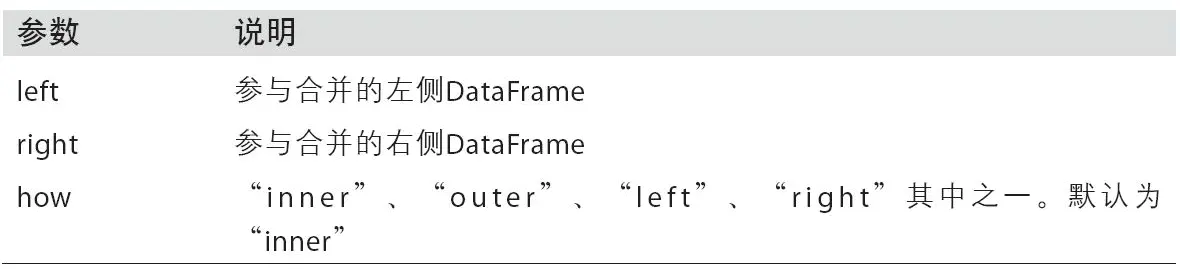

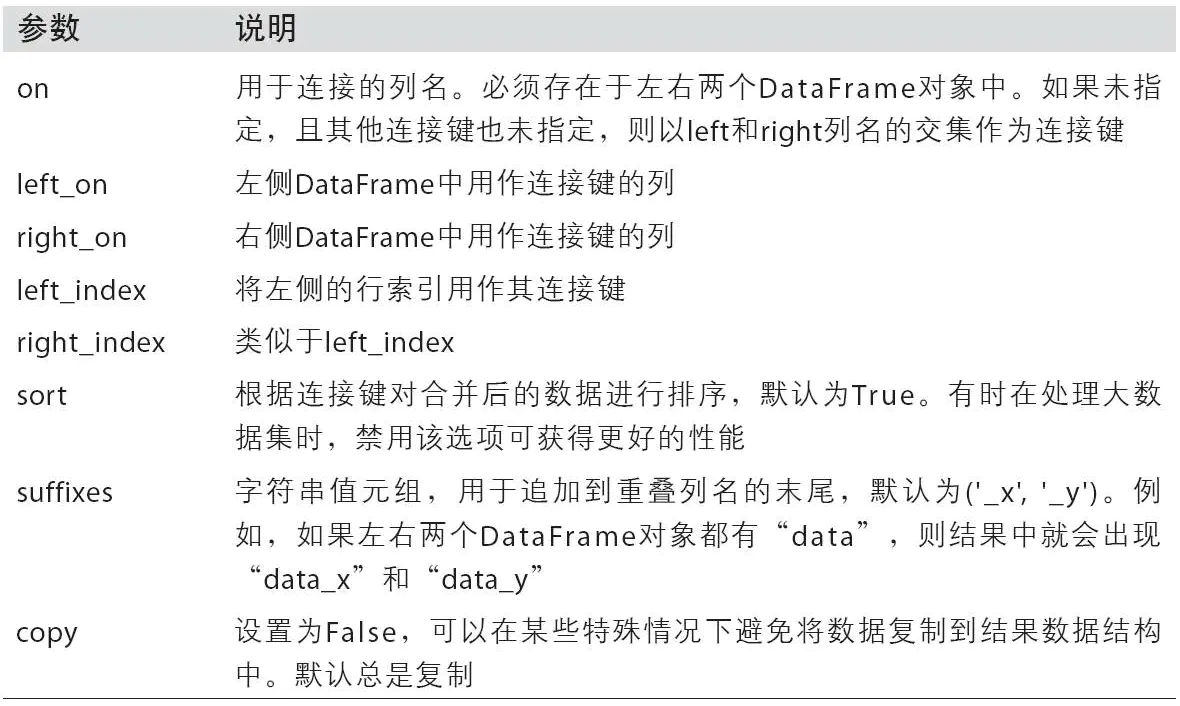

#### Merging on Index（索引上合并）

In [73]:
left1 = pd.DataFrame({'key': ['a', 'b', 'a', 'a', 'b', 'c'],
                        'value': range(6)})
right1 = pd.DataFrame({'group_val': [3.5, 7]}, index=['a', 'b'])

In [74]:
left1

,key,value
0,a,0
1,b,1
2,a,2
3,a,3
4,b,4
5,c,5


In [75]:
right1

,group_val
a,3.5
b,7.0


In [76]:
# right1的index被用作key
pd.merge(left1, right1, left_on = 'key', right_index = True)

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0


In [77]:
pd.merge(left1, right1, left_on = 'key', right_index = True, how = 'outer')# 并集

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0
5,c,5,NaN


In [78]:
lefth = pd.DataFrame({'key1': ['Ohio', 'Ohio', 'Ohio',
                                'Nevada', 'Nevada'],
                       'key2': [2000, 2001, 2002, 2001, 2002],
                      'data': np.arange(5.)})
righth = pd.DataFrame(np.arange(12).reshape((6, 2)),
                       index=[['Nevada', 'Nevada', 'Ohio', 'Ohio',
                               'Ohio', 'Ohio'],
                             [2001, 2000, 2000, 2000, 2001, 2002]],
                      columns=['event1', 'event2'])

In [79]:
lefth

,key1,key2,data
0,Ohio,2000,0.0
1,Ohio,2001,1.0
2,Ohio,2002,2.0
3,Nevada,2001,3.0
4,Nevada,2002,4.0


In [80]:
righth

event1  event2
Nevada 2001       0       1
       2000       2       3
Ohio   2000       4       5
       2000       6       7
       2001       8       9
       2002      10      11

In [81]:
# 多层次合并
pd.merge(lefth, righth, left_on = ['key1', 'key2'], right_index=True)

,key1,key2,data,event1,event2
0,Ohio,2000,0.0,4,5
0,Ohio,2000,0.0,6,7
1,Ohio,2001,1.0,8,9
2,Ohio,2002,2.0,10,11
3,Nevada,2001,3.0,0,1


In [83]:
pd.merge(lefth, righth, left_on = ['key1', 'key2'], 
         right_index = True, how = 'outer')

,key1,key2,data,event1,event2
0,Ohio,2000,0.0,4.0,5.0
0,Ohio,2000,0.0,6.0,7.0
1,Ohio,2001,1.0,8.0,9.0
2,Ohio,2002,2.0,10.0,11.0
3,Nevada,2001,3.0,0.0,1.0
4,Nevada,2002,4.0,NaN,NaN
4,Nevada,2000,NaN,2.0,3.0


In [84]:
left2 = pd.DataFrame([[1., 2.],[3., 4.,],[5., 6.]],
                    index = ['a', 'c', 'e'],
                    columns = ['Ohio', 'Nevada'])
right2 = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [13, 14]],
                       index=['b', 'c', 'd', 'e'],
                       columns=['Missouri', 'Alabama'])

In [85]:
pd.merge(left2, right2, how = 'outer', left_index= True, right_index = True)
# 合并双方的索引

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


In [88]:
left2.join(right2, how = 'outer') #使用join()进行合并，要求没有重叠的列

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


In [89]:
left1.join(right1, on = 'key') # join默认左连接

,key,value,group_val
0,a,0,3.5
1,b,1,7.0
2,a,2,3.5
3,a,3,3.5
4,b,4,7.0
5,c,5,NaN


In [90]:
another = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [16., 17.]],
                        index=['a', 'c', 'e', 'f'],
                        columns=['New York','Oregon'])
another

,New York,Oregon
a,7.0,8.0
c,9.0,10.0
e,11.0,12.0
f,16.0,17.0


In [91]:
left2.join([right2, another]) # 向join传入一组DataFrame

,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0,9.0,10.0
e,5.0,6.0,13.0,14.0,11.0,12.0


In [92]:
left2.join([right2, another], how='outer')

,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0,9.0,10.0
e,5.0,6.0,13.0,14.0,11.0,12.0
b,NaN,NaN,7.0,8.0,NaN,NaN
d,NaN,NaN,11.0,12.0,NaN,NaN
f,NaN,NaN,NaN,NaN,16.0,17.0


### Concatenating Along an Axis（轴向连接）

In [93]:
arr = np.arange(12).reshape((3, 4))

In [94]:
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [95]:
np.concatenate([arr, arr], axis = 1)

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

In [96]:
s1 = pd.Series([0, 1], index = ['a', 'b'])
s2 = pd.Series([2, 3, 4], index = ['c', 'd', 'e'])
s3 = pd.Series([5, 6], index = ['f', 'g'])

In [98]:
pd.concat([s1, s2, s3]) # 调用concat()粘合三个没有重叠索引的Series

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

In [99]:
pd.concat([s1, s2, s3], axis=1) #设列为粘结，生成DataFrame

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [100]:
s4 = pd.concat([s1, s3])
s4

a    0
b    1
f    5
g    6
dtype: int64

In [101]:
pd.concat([s1, s4], axis = 1)

,0,1
a,0.0,0
b,1.0,1
f,NaN,5
g,NaN,6


In [102]:
pd.concat([s1, s4], axis = 1, join = 'inner') # 取交集

,0,1
a,0,0
b,1,1


In [105]:
'''
pd.concat([s1, s4], axis=1, join_axes =[['a', 'c', 'b', 'e']]) # 取特定index
join_axes已被弃用
'''

"\npd.concat([s1, s4], axis=1, join_axes =[['a', 'c', 'b', 'e']]) # 取特定index\njoin_axes已被弃用\n"

In [108]:
result = pd.concat([s1, s1, s3], keys=['one', 'two', 'three']) #使用key参数区分片段

In [109]:
result

one    a    0
       b    1
two    a    0
       b    1
three  f    5
       g    6
dtype: int64

In [111]:
result.unstack() #重新排列

,a,b,f,g
one,0.0,1.0,NaN,NaN
two,0.0,1.0,NaN,NaN
three,NaN,NaN,5.0,6.0


In [113]:
pd.concat([s1, s2, s3], axis=1, keys=['one','two', 'three'])
# axis=1时，key作为列头出现

,one,two,three
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [115]:
df1 = pd.DataFrame(np.arange(6).reshape(3, 2), index=['a', 'b', 'c'],
                    columns=['one', 'two'])
df2 = pd.DataFrame(5 + np.arange(4).reshape(2, 2), index = ['a','c'],
                  columns = ['three', 'four'])
df1

,one,two
a,0,1
b,2,3
c,4,5


In [116]:
df2

,three,four
a,5,6
c,7,8


In [118]:
pd.concat([df1, df2], axis = 1, keys = ['level1', 'level2']) 
# DataFrame同样适用keys特性

level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

In [119]:
pd.concat([df1, df2], axis=1, keys=['level1', 'level2'],
           names=['upper', 'lower'])

upper level1     level2     
lower    one two  three four
a          0   1    5.0  6.0
b          2   3    NaN  NaN
c          4   5    7.0  8.0

In [120]:
df1 = pd.DataFrame(np.random.randn(3, 4), columns=['a', 'b', 'c', 'd'])
df2 = pd.DataFrame(np.random.randn(2, 3), columns=['b', 'd', 'a'])

In [121]:
df1

,a,b,c,d
0,-1.344713,-0.111235,-0.596805,-0.404500
1,1.997924,-0.646209,-0.069196,-0.281984
2,-0.526979,-0.344420,0.017207,-2.017329


In [122]:
df2

,b,d,a
0,1.208394,0.148470,-2.231700
1,0.093202,-0.274516,0.152408


In [125]:
# DataFrame的行索引不包含任何相关数据：
pd.concat([df1, df2], ignore_index= True)

,a,b,c,d
0,-1.344713,-0.111235,-0.596805,-0.404500
1,1.997924,-0.646209,-0.069196,-0.281984
2,-0.526979,-0.344420,0.017207,-2.017329
3,-2.231700,1.208394,NaN,0.148470
4,0.152408,0.093202,NaN,-0.274516


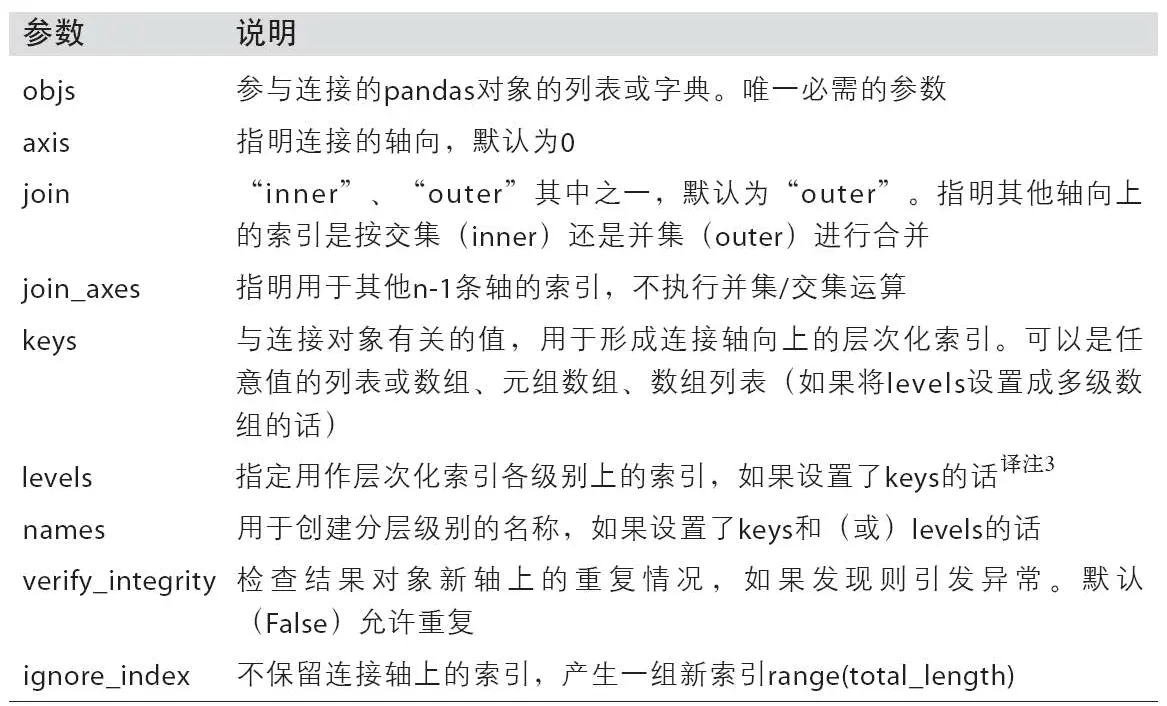

#### Combining Data with Overlap（合并重叠数据）

In [134]:
a = pd.Series([np.nan, 2.5, np.nan, 3.5, 4.5, np.nan],
               index=['f', 'e', 'd', 'c', 'b', 'a'])

b = pd.Series(np.arange(len(a), dtype=np.float64),
              index=['f', 'e', 'd', 'c', 'b', 'a'])

In [135]:
b[-1] = np.nan

In [136]:
a

f    NaN
e    2.5
d    NaN
c    3.5
b    4.5
a    NaN
dtype: float64

In [137]:
b

f    0.0
e    1.0
d    2.0
c    3.0
b    4.0
a    NaN
dtype: float64

In [138]:
np.where(pd.isnull(a), b, a) #np.where(条件，条件符合返回值，条件不符合返回值)

array([0. , 2.5, 2. , 3.5, 4.5, nan])

In [140]:
a.combine_first(b) #conbine_first达到同样效果

f    0.0
e    2.5
d    2.0
c    3.5
b    4.5
a    NaN
dtype: float64

In [141]:
df1 = pd.DataFrame({'a': [1., np.nan, 5., np.nan],
                     'b': [np.nan, 2., np.nan, 6.],
                     'c': range(2, 18, 4)})
df2 = pd.DataFrame({'a': [5., 4., np.nan, 3., 7.],
                     'b': [np.nan, 3., 4., 6., 8.]})

In [142]:
df1

,a,b,c
0,1.0,NaN,2
1,NaN,2.0,6
2,5.0,NaN,10
3,NaN,6.0,14


In [143]:
df2

,a,b
0,5.0,NaN
1,4.0,3.0
2,NaN,4.0
3,3.0,6.0
4,7.0,8.0


In [144]:
df1.combine_first(df2) 
#用passing object(传递对象)的数据为calling object(调用对象)的缺失数据“打补丁”

,a,b,c
0,1.0,NaN,2.0
1,4.0,2.0,6.0
2,5.0,4.0,10.0
3,3.0,6.0,14.0
4,7.0,8.0,NaN


### 8.3 Reshaping and Pivoting（重塑与轴向旋转）

In [145]:
data = pd.DataFrame(np.arange(6).reshape((2, 3)),
                     index=pd.Index(['Ohio','Colorado'], name='state'),
                     columns=pd.Index(['one', 'two', 'three'],
                     name='number'))

In [146]:
data

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [147]:
result = data.stack() # 使用stack方法即可将column转换为row，得到一个Series
result

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int32

In [148]:
result.unstack()# 用unstack将其重排为一个DataFrame

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


默认情况下，unstack操作的是最内层（stack也是如此）。传入分层级别的编号或名称即可对其它级别进行unstack操作

In [149]:
result.unstack(0)

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [150]:
result.unstack('state')

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [151]:
s1 = pd.Series([0, 1, 2, 3], index=['a', 'b', 'c', 'd'])

s2 = pd.Series([4, 5, 6], index=['c', 'd', 'e'])

data2 = pd.concat([s1, s2], keys=['one', 'two'])

data2

one  a    0
     b    1
     c    2
     d    3
two  c    4
     d    5
     e    6
dtype: int64

In [152]:
data2.unstack() 
#如果值在各个level中不完整，则unstack()会引入missing data（缺失数据）

,a,b,c,d,e
one,0.0,1.0,2.0,3.0,NaN
two,NaN,NaN,4.0,5.0,6.0


In [153]:
data2.unstack().stack() # stack()可逆，自动过滤missing data

one  a    0.0
     b    1.0
     c    2.0
     d    3.0
two  c    4.0
     d    5.0
     e    6.0
dtype: float64

In [154]:
data2.unstack().stack(dropna=False) #保留missing data

one  a    0.0
     b    1.0
     c    2.0
     d    3.0
     e    NaN
two  a    NaN
     b    NaN
     c    4.0
     d    5.0
     e    6.0
dtype: float64

In [155]:
df = pd.DataFrame({'left': result, 'right': result + 5},
                  columns=pd.Index(['left', 'right'], name='side'))

In [156]:
df

side             left  right
state    number             
Ohio     one        0      5
         two        1      6
         three      2      7
Colorado one        3      8
         two        4      9
         three      5     10

In [157]:
# 在对DataFrame进行unstack操作时，作为旋转轴的级别将会成为结果中的最低级别：
df.unstack('state') #转换后‘state’为最低level

side   left          right         
state  Ohio Colorado  Ohio Colorado
number                             
one       0        3     5        8
two       1        4     6        9
three     2        5     7       10

In [159]:
df.unstack('state').stack('side') # 指明轴的名字

state         Colorado  Ohio
number side                 
one    left          3     0
       right         8     5
two    left          4     1
       right         9     6
three  left          5     2
       right        10     7

#### Pivoting “Long” to “Wide” Format（将“长格式”旋转为“宽格式”）

In [187]:
data = pd.read_csv('Course_Material/examples/macrodata.csv')

In [188]:
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [189]:
periods = pd.PeriodIndex(year=data.year, quarter=data.quarter, name='date')

In [190]:
columns = pd.Index(['realgdp', 'infl', 'unemp'], name='item')

In [191]:
data = data.reindex(columns = columns)

In [192]:
data.index = periods.to_timestamp('D', 'end')

In [193]:
ldata = data.stack().reset_index().rename(columns = {0: 'value'})

In [194]:
pivoted = ldata.pivot('date', 'item', 'value') # date列中的时间戳则用作索引

In [195]:
pivoted # 前两个值作为index

item,infl,realgdp,unemp
date,,,
1959-03-31 23:59:59.999999999,0.00,2710.349,5.8
1959-06-30 23:59:59.999999999,2.34,2778.801,5.1
1959-09-30 23:59:59.999999999,2.74,2775.488,5.3
1959-12-31 23:59:59.999999999,0.27,2785.204,5.6
1960-03-31 23:59:59.999999999,2.31,2847.699,5.2
...,...,...,...
2008-09-30 23:59:59.999999999,-3.16,13324.600,6.0
2008-12-31 23:59:59.999999999,-8.79,13141.920,6.9
2009-03-31 23:59:59.999999999,0.94,12925.410,8.1


In [196]:
ldata['value2'] = np.random.randn(len(ldata))
ldata[:10]

,date,item,value,value2
0,1959-03-31 23:59:59.999999999,realgdp,2710.349,-2.440375
1,1959-03-31 23:59:59.999999999,infl,0.000,-0.639724
2,1959-03-31 23:59:59.999999999,unemp,5.800,-0.512697
3,1959-06-30 23:59:59.999999999,realgdp,2778.801,0.450122
4,1959-06-30 23:59:59.999999999,infl,2.340,0.675093
5,1959-06-30 23:59:59.999999999,unemp,5.100,1.382124
6,1959-09-30 23:59:59.999999999,realgdp,2775.488,-0.326323
7,1959-09-30 23:59:59.999999999,infl,2.740,0.761725
8,1959-09-30 23:59:59.999999999,unemp,5.300,0.545592
9,1959-12-31 23:59:59.999999999,realgdp,2785.204,-0.958345


In [197]:
pivoted = ldata.pivot('date', 'item') 
# 如果忽略最后一个参数，得到的DataFrame就会带有层次化的列
pivoted[:5]

value                    value2            \
item                           infl   realgdp unemp      infl   realgdp   
date                                                                      
1959-03-31 23:59:59.999999999  0.00  2710.349   5.8 -0.639724 -2.440375   
1959-06-30 23:59:59.999999999  2.34  2778.801   5.1  0.675093  0.450122   
1959-09-30 23:59:59.999999999  2.74  2775.488   5.3  0.761725 -0.326323   
1959-12-31 23:59:59.999999999  0.27  2785.204   5.6 -1.648164 -0.958345   
1960-03-31 23:59:59.999999999  2.31  2847.699   5.2  0.220597 -1.616629   

                                         
item                              unemp  
date                                     
1959-03-31 23:59:59.999999999 -0.512697  
1959-06-30 23:59:59.999999999  1.382124  
1959-09-30 23:59:59.999999999  0.545592  
1959-12-31 23:59:59.999999999  0.913695  
1960-03-31 23:59:59.999999999 -0.497973

In [198]:
pivoted['value'][:5]

item,infl,realgdp,unemp
date,,,
1959-03-31 23:59:59.999999999,0.00,2710.349,5.8
1959-06-30 23:59:59.999999999,2.34,2778.801,5.1
1959-09-30 23:59:59.999999999,2.74,2775.488,5.3
1959-12-31 23:59:59.999999999,0.27,2785.204,5.6
1960-03-31 23:59:59.999999999,2.31,2847.699,5.2


In [199]:
# pivot其实就是用set_index创建层次化索引，再用unstack重塑：
unstacked = ldata.set_index(['date', 'item']).unstack('item')
unstacked.head()

value                    value2            \
item                           infl   realgdp unemp      infl   realgdp   
date                                                                      
1959-03-31 23:59:59.999999999  0.00  2710.349   5.8 -0.639724 -2.440375   
1959-06-30 23:59:59.999999999  2.34  2778.801   5.1  0.675093  0.450122   
1959-09-30 23:59:59.999999999  2.74  2775.488   5.3  0.761725 -0.326323   
1959-12-31 23:59:59.999999999  0.27  2785.204   5.6 -1.648164 -0.958345   
1960-03-31 23:59:59.999999999  2.31  2847.699   5.2  0.220597 -1.616629   

                                         
item                              unemp  
date                                     
1959-03-31 23:59:59.999999999 -0.512697  
1959-06-30 23:59:59.999999999  1.382124  
1959-09-30 23:59:59.999999999  0.545592  
1959-12-31 23:59:59.999999999  0.913695  
1960-03-31 23:59:59.999999999 -0.497973

#### Pivoting "wide" to "long" Format（将“宽格式”旋转为“长格式”）

In [205]:
df = pd.DataFrame({'key': ['foo', 'bar', 'baz'],
                    'A': [1, 2, 3],
                    'B': [4, 5, 6],
                    'C': [7, 8, 9]})

In [206]:
df

,key,A,B,C
0,foo,1,4,7
1,bar,2,5,8
2,baz,3,6,9


In [207]:
melted = pd.melt(df, ['key']) # 使用pandas.melt，我们必须指明哪些列是分组指标

In [208]:
melted

,key,variable,value
0,foo,A,1
1,bar,A,2
2,baz,A,3
3,foo,B,4
4,bar,B,5
5,baz,B,6
6,foo,C,7
7,bar,C,8
8,baz,C,9


In [209]:
reshaped = melted.pivot('key', 'variable', 'value') # 重塑

In [210]:
reshaped

variable,A,B,C
key,,,
bar,2,5,8
baz,3,6,9
foo,1,4,7


In [211]:
# 你还可以指定列的子集，作为值的列
pd.melt(df, id_vars = ['key'], value_vars=['A', 'B'])

,key,variable,value
0,foo,A,1
1,bar,A,2
2,baz,A,3
3,foo,B,4
4,bar,B,5
5,baz,B,6


In [212]:
pd.melt(df, value_vars = ['A', 'B', 'C'])

,variable,value
0,A,1
1,A,2
2,A,3
3,B,4
4,B,5
5,B,6
6,C,7
7,C,8
8,C,9
